<a href="https://colab.research.google.com/github/DanielWarfield1/MLWritingAndResearch/blob/main/GeneticAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining Problem 1

In [39]:
teachers = {
    'Morgan': ['math', 'physics', 'statistics', 'computer science'],
    'Jordan': ['english', 'creative writing', 'drama', 'debate'],
    'Casey': ['biology', 'chemistry', 'psychology', 'sociology'],
    'Riley': ['history', 'geography', 'economics', 'business'],
    'Quinn': ['art', 'music', 'theater', 'french', 'german', 'spanish'],
    'Taylor': ['philosophy', 'ethics', 'english', 'health', 'physical education'],
    'Alex': ['robotics', 'engineering', 'environmental science']
}


In [40]:
classes = {
    'physics1': {'type': 'physics', 'weekly_instances': 3, 'requires_media': False, 'requires_computers': False, 'requires_chemlab': False, 'class_size': 20},
    'modern sculpture': {'type': 'art', 'weekly_instances': 2, 'requires_media': False, 'requires_computers': False, 'requires_chemlab': False, 'class_size': 15},
    'jazz': {'type': 'music', 'weekly_instances': 2, 'requires_media': True, 'requires_computers': False, 'requires_chemlab': False, 'class_size': 16},
    'calculus AB': {'type': 'math', 'weekly_instances': 3, 'requires_media': False, 'requires_computers': False, 'requires_chemlab': False, 'class_size': 18},
    'british literature': {'type': 'english', 'weekly_instances': 3, 'requires_media': False, 'requires_computers': False, 'requires_chemlab': False, 'class_size': 22},
    'french 1': {'type': 'french', 'weekly_instances': 2, 'requires_media': True, 'requires_computers': False, 'requires_chemlab': False, 'class_size': 17},
    'intro to psychology': {'type': 'psychology', 'weekly_instances': 2, 'requires_media': False, 'requires_computers': True, 'requires_chemlab': False, 'class_size': 20},
    'principles of sociology': {'type': 'sociology', 'weekly_instances': 2, 'requires_media': False, 'requires_computers': True, 'requires_chemlab': False, 'class_size': 19},
    'introduction to programming': {'type': 'computer science', 'weekly_instances': 3, 'requires_media': False, 'requires_computers': True, 'requires_chemlab': False, 'class_size': 20},
    'AP biology': {'type': 'biology', 'weekly_instances': 3, 'requires_media': False, 'requires_computers': False, 'requires_chemlab': True, 'class_size': 20},
    'chemistry fundamentals': {'type': 'chemistry', 'weekly_instances': 3, 'requires_media': False, 'requires_computers': False, 'requires_chemlab': True, 'class_size': 21},
    'debate and rhetoric': {'type': 'debate', 'weekly_instances': 2, 'requires_media': False, 'requires_computers': False, 'requires_chemlab': False, 'class_size': 18},
    'statistics and probability': {'type': 'statistics', 'weekly_instances': 3, 'requires_media': False, 'requires_computers': True, 'requires_chemlab': False, 'class_size': 23}
}


In [41]:
rooms = {
    'Room 101': {'capacity': 30, 'has_media': False, 'has_computers': False, 'is_chemlab': False},
    'Room 102': {'capacity': 25, 'has_media': True, 'has_computers': False, 'is_chemlab': False},
    'Room 105': {'capacity': 30, 'has_media': True, 'has_computers': True, 'is_chemlab': False},
    'Art Studio A': {'capacity': 20, 'has_media': True, 'has_computers': False, 'is_chemlab': False},
    'Drama Stage': {'capacity': 25, 'has_media': True, 'has_computers': False, 'is_chemlab': False},
    'Gym A': {'capacity': 30, 'has_media': False, 'has_computers': False, 'is_chemlab': False},
    'Computer Lab 2': {'capacity': 20, 'has_media': False, 'has_computers': True, 'is_chemlab': False},
    'Chem Lab A': {'capacity': 20, 'has_media': False, 'has_computers': False, 'is_chemlab': True},
    'Lecture Hall 2': {'capacity': 35, 'has_media': True, 'has_computers': False, 'is_chemlab': False},
    'Language Lab': {'capacity': 20, 'has_media': True, 'has_computers': True, 'is_chemlab': False},
    'Philosophy Room': {'capacity': 18, 'has_media': False, 'has_computers': False, 'is_chemlab': False}
}

## Re-Representing as chromosome

In [42]:
import pandas as pd

# Parameters
num_periods = 8
num_days = 5

# Generate timeslots like "Period 1_Day 1", "Period 2_Day 3", etc.
timeslots = [f'Period {p+1}_Day {d+1}' for d in range(num_days) for p in range(num_periods)]

# Create list of room-timeslot pairs
data = [{'room': room, 'timeslot': timeslot} for room in rooms.keys() for timeslot in timeslots]

# Create DataFrame
df = pd.DataFrame(data)
df

,room,timeslot
0,Room 101,Period 1_Day 1
1,Room 101,Period 2_Day 1
2,Room 101,Period 3_Day 1
3,Room 101,Period 4_Day 1
4,Room 101,Period 5_Day 1
...,...,...
435,Philosophy Room,Period 4_Day 5
436,Philosophy Room,Period 5_Day 5
437,Philosophy Room,Period 6_Day 5
438,Philosophy Room,Period 7_Day 5


# Creating Random Population Member

In [43]:
import random

def create_population_member():

    # Pull class names and teacher names
    class_names = list(classes.keys())
    teacher_names = list(teachers.keys())

    # Define probability of assigning None vs a valid entry
    none_prob = 0.2  # 20% chance of being None

    # Randomly assign class and teacher
    df['class'] = [random.choice(class_names + [None] * int(len(class_names) * none_prob)) for _ in range(len(df))]
    df['teacher'] = [random.choice(teacher_names + [None] * int(len(teacher_names) * none_prob)) for _ in range(len(df))]

    return df.copy(deep=True)

create_population_member()

,room,timeslot,class,teacher
0,Room 101,Period 1_Day 1,french 1,Taylor
1,Room 101,Period 2_Day 1,principles of sociology,None
2,Room 101,Period 3_Day 1,chemistry fundamentals,Morgan
3,Room 101,Period 4_Day 1,debate and rhetoric,Taylor
4,Room 101,Period 5_Day 1,None,Taylor
...,...,...,...,...
435,Philosophy Room,Period 4_Day 5,physics1,Riley
436,Philosophy Room,Period 5_Day 5,jazz,Morgan
437,Philosophy Room,Period 6_Day 5,statistics and probability,Casey
438,Philosophy Room,Period 7_Day 5,chemistry fundamentals,Casey


# Creating Population

In [44]:
population = [create_population_member() for _ in range(100)]

# Selection

In [45]:
def fitness(chromosome):
    penalty = 0

    teacher_timeslot_set = set()
    class_instance_counter = {}

    for idx, row in chromosome.iterrows():
        class_name = row['class']
        teacher = row['teacher']
        room = row['room']
        timeslot = row['timeslot']

        if class_name is None or teacher is None:
            continue  # No assignment, skip

        # Track how many times this class is scheduled
        class_instance_counter[class_name] = class_instance_counter.get(class_name, 0) + 1

        # 1. Teacher qualified?
        class_info = classes[class_name]
        class_type = class_info['type']
        if class_type not in teachers.get(teacher, []):
            penalty += 10

        # 2. Room resources
        room_info = rooms[room]
        if class_info['requires_media'] and not room_info['has_media']:
            penalty += 5
        if class_info['requires_computers'] and not room_info['has_computers']:
            penalty += 5
        if class_info['requires_chemlab'] and not room_info['is_chemlab']:
            penalty += 5

        # 3. Room capacity
        if room_info['capacity'] < class_info['class_size']:
            penalty += (class_info['class_size'] - room_info['capacity'])

        # 4. Double-booked teacher
        key = (teacher, timeslot)
        if key in teacher_timeslot_set:
            penalty += 15
        else:
            teacher_timeslot_set.add(key)

    # 5. Penalize over/under-scheduling of classes
    for class_name, class_info in classes.items():
        required = class_info['weekly_instances']
        actual = class_instance_counter.get(class_name, 0)
        if actual != required:
            penalty += abs(required - actual) * 5  # Penalty per instance off

    return -penalty

fitness(population[0])

-7807

In [46]:
def selection(population):
    # Evaluate fitness for each chromosome
    scored_population = [
        (chromosome, fitness(chromosome))
        for chromosome in population
    ]

    # Sort by fitness (higher is better)
    scored_population.sort(key=lambda x: x[1], reverse=True)

    # Keep top 50%
    num_survivors = len(population) // 2
    survivors = [chromosome for chromosome, _ in scored_population[:num_survivors]]

    return survivors

survivors = selection(population)
len(survivors)

50

# Crossover

In [47]:
import random

def crossover(survivors, crossover_rate=0.5):
    original_population_size = len(survivors) * 2
    offspring = []

    while len(offspring) < len(survivors):
        # Pick two distinct parents
        parent1, parent2 = random.sample(survivors, 2)

        # Create a new child DataFrame
        child = parent1.copy()
        for idx in child.index:
            if random.random() < crossover_rate:
                child.at[idx, 'class'] = parent1.at[idx, 'class']
                child.at[idx, 'teacher'] = parent1.at[idx, 'teacher']
            else:
                child.at[idx, 'class'] = parent2.at[idx, 'class']
                child.at[idx, 'teacher'] = parent2.at[idx, 'teacher']

        offspring.append(child)

    return survivors + offspring

new_population = crossover(survivors)
len(new_population)

100

# Mutation

In [48]:
import random

def mutate(population, mutation_rate=0.01):
    class_names = list(classes.keys())
    teacher_names = list(teachers.keys())

    for chromosome in population:
        for idx in chromosome.index:
            # Mutate class
            if random.random() < mutation_rate:
                chromosome.at[idx, 'class'] = random.choice(class_names + [None])

            # Mutate teacher
            if random.random() < mutation_rate:
                chromosome.at[idx, 'teacher'] = random.choice(teacher_names + [None])

    return population

mutated_population = mutate(new_population)
len(mutated_population)

100

In [51]:
import random

def mutate(population, mutation_rate=0.01):
    class_names = list(classes.keys())

    for chromosome in population:
        for idx in chromosome.index:
            # Mutate class and teacher for a given classroom timeslot
            if random.random() < mutation_rate:
                new_class = random.choice(class_names + [None])
                chromosome.at[idx, 'class'] = new_class

                if new_class is None:
                    possible_teachers = list(teachers.keys()) + [None]
                else:
                    class_type = classes[new_class]['type']
                    possible_teachers = [
                        t for t, qualified_types in teachers.items()
                        if class_type in qualified_types
                    ] + [None]

                if possible_teachers:
                    chromosome.at[idx, 'teacher'] = random.choice(possible_teachers)

    return population


mutated_population = mutate(new_population)
len(mutated_population)

100

# Optimizing Schedule

In [55]:
import matplotlib.pyplot as plt
from tqdm import tqdm

# --- Set up GA loop ---
population_size = 40
generations = 300

# Assume df is a DataFrame of room-timeslot pairs
df_template = df[['room', 'timeslot']].copy()  # reuse your earlier structure

population = [create_population_member() for _ in range(population_size)]

avg_fitness = []
min_fitness = []
max_fitness = []

for gen in tqdm(range(generations), desc="Evolving", dynamic_ncols=True):
    scores = [fitness(chrom) for chrom in population]

    avg = sum(scores) / len(scores)
    mn = min(scores)
    mx = max(scores)

    avg_fitness.append(avg)
    min_fitness.append(mn)
    max_fitness.append(mx)

    tqdm.write(f"Gen {gen} — avg: {avg:.1f}, min: {mn:.1f}, max: {mx:.1f}")

    survivors = selection(population)
    population = crossover(survivors, crossover_rate=0.7)
    population = mutate(population, mutation_rate=0.005)


Evolving:   0%|          | 0/300 [00:00<?, ?it/s]

Gen 0 — avg: -7204.1, min: -7880.0, max: -6822.0


Evolving:   0%|          | 1/300 [00:02<10:00,  2.01s/it]

Gen 1 — avg: -7001.2, min: -7377.0, max: -6636.0


Evolving:   1%|          | 2/300 [00:05<11:38,  2.34s/it]

Gen 2 — avg: -6863.1, min: -7465.0, max: -6519.0


Evolving:   1%|          | 3/300 [00:07<11:41,  2.36s/it]

Gen 3 — avg: -6708.1, min: -6987.0, max: -6489.0


Evolving:   1%|▏         | 4/300 [00:09<10:55,  2.22s/it]

Gen 4 — avg: -6594.7, min: -6932.0, max: -6301.0


Evolving:   2%|▏         | 5/300 [00:11<10:26,  2.12s/it]

Gen 5 — avg: -6476.3, min: -6758.0, max: -6246.0


Evolving:   2%|▏         | 6/300 [00:13<10:11,  2.08s/it]

Gen 6 — avg: -6364.1, min: -6606.0, max: -5864.0


Evolving:   2%|▏         | 7/300 [00:15<10:00,  2.05s/it]

Gen 7 — avg: -6274.9, min: -6651.0, max: -5849.0


Evolving:   3%|▎         | 8/300 [00:18<10:54,  2.24s/it]

Gen 8 — avg: -6165.7, min: -6473.0, max: -5824.0


Evolving:   3%|▎         | 9/300 [00:20<10:57,  2.26s/it]

Gen 9 — avg: -6046.0, min: -6253.0, max: -5738.0


Evolving:   3%|▎         | 10/300 [00:22<10:31,  2.18s/it]

Gen 10 — avg: -5930.1, min: -6226.0, max: -5720.0


Evolving:   4%|▎         | 11/300 [00:24<10:09,  2.11s/it]

Gen 11 — avg: -5805.8, min: -6112.0, max: -5423.0


Evolving:   4%|▍         | 12/300 [00:26<09:58,  2.08s/it]

Gen 12 — avg: -5680.1, min: -5968.0, max: -5408.0


Evolving:   4%|▍         | 13/300 [00:28<09:46,  2.04s/it]

Gen 13 — avg: -5545.6, min: -5810.0, max: -5164.0


Evolving:   5%|▍         | 14/300 [00:31<10:51,  2.28s/it]

Gen 14 — avg: -5434.6, min: -5678.0, max: -5142.0


Evolving:   5%|▌         | 15/300 [00:33<10:36,  2.23s/it]

Gen 15 — avg: -5337.9, min: -5616.0, max: -4992.0


Evolving:   5%|▌         | 16/300 [00:35<10:12,  2.16s/it]

Gen 16 — avg: -5251.6, min: -5607.0, max: -4936.0


Evolving:   6%|▌         | 17/300 [00:37<09:52,  2.09s/it]

Gen 17 — avg: -5150.7, min: -5400.0, max: -4700.0


Evolving:   6%|▌         | 18/300 [00:39<09:39,  2.06s/it]

Gen 18 — avg: -5043.9, min: -5240.0, max: -4677.0


Evolving:   6%|▋         | 19/300 [00:41<09:31,  2.03s/it]

Gen 19 — avg: -4931.2, min: -5233.0, max: -4652.0


Evolving:   7%|▋         | 20/300 [00:44<10:41,  2.29s/it]

Gen 20 — avg: -4856.4, min: -5287.0, max: -4620.0


Evolving:   7%|▋         | 21/300 [00:46<10:14,  2.20s/it]

Gen 21 — avg: -4755.6, min: -4978.0, max: -4534.0


Evolving:   7%|▋         | 22/300 [00:48<09:52,  2.13s/it]

Gen 22 — avg: -4655.9, min: -4765.0, max: -4478.0


Evolving:   8%|▊         | 23/300 [00:50<09:36,  2.08s/it]

Gen 23 — avg: -4596.4, min: -4879.0, max: -4416.0


Evolving:   8%|▊         | 24/300 [00:53<09:53,  2.15s/it]

Gen 24 — avg: -4514.0, min: -4679.0, max: -4346.0


Evolving:   8%|▊         | 25/300 [00:56<11:04,  2.42s/it]

Gen 25 — avg: -4468.8, min: -4657.0, max: -4346.0


Evolving:   9%|▊         | 26/300 [00:58<11:11,  2.45s/it]

Gen 26 — avg: -4402.8, min: -4582.0, max: -4188.0


Evolving:   9%|▉         | 27/300 [01:00<10:27,  2.30s/it]

Gen 27 — avg: -4329.9, min: -4478.0, max: -4118.0


Evolving:   9%|▉         | 28/300 [01:02<09:57,  2.20s/it]

Gen 28 — avg: -4269.1, min: -4446.0, max: -4048.0


Evolving:  10%|▉         | 29/300 [01:04<09:36,  2.13s/it]

Gen 29 — avg: -4173.8, min: -4331.0, max: -4020.0


Evolving:  10%|█         | 30/300 [01:05<09:19,  2.07s/it]

Gen 30 — avg: -4114.3, min: -4301.0, max: -3917.0


Evolving:  10%|█         | 31/300 [01:08<09:44,  2.17s/it]

Gen 31 — avg: -4028.7, min: -4253.0, max: -3788.0


Evolving:  11%|█         | 32/300 [01:10<10:10,  2.28s/it]

Gen 32 — avg: -3948.6, min: -4091.0, max: -3748.0


Evolving:  11%|█         | 33/300 [01:12<09:42,  2.18s/it]

Gen 33 — avg: -3876.8, min: -4093.0, max: -3728.0


Evolving:  11%|█▏        | 34/300 [01:14<09:23,  2.12s/it]

Gen 34 — avg: -3822.5, min: -3983.0, max: -3672.0


Evolving:  12%|█▏        | 35/300 [01:16<09:07,  2.07s/it]

Gen 35 — avg: -3767.2, min: -3916.0, max: -3592.0


Evolving:  12%|█▏        | 36/300 [01:18<08:58,  2.04s/it]

Gen 36 — avg: -3715.7, min: -3852.0, max: -3548.0


Evolving:  12%|█▏        | 37/300 [01:21<09:26,  2.15s/it]

Gen 37 — avg: -3647.0, min: -3815.0, max: -3531.0


Evolving:  13%|█▎        | 38/300 [01:23<09:51,  2.26s/it]

Gen 38 — avg: -3594.9, min: -3781.0, max: -3423.0


Evolving:  13%|█▎        | 39/300 [01:25<09:26,  2.17s/it]

Gen 39 — avg: -3547.2, min: -3689.0, max: -3430.0


Evolving:  13%|█▎        | 40/300 [01:27<09:07,  2.10s/it]

Gen 40 — avg: -3474.7, min: -3570.0, max: -3248.0


Evolving:  14%|█▎        | 41/300 [01:29<08:54,  2.06s/it]

Gen 41 — avg: -3418.7, min: -3569.0, max: -3248.0


Evolving:  14%|█▍        | 42/300 [01:31<08:43,  2.03s/it]

Gen 42 — avg: -3356.0, min: -3485.0, max: -3143.0


Evolving:  14%|█▍        | 43/300 [01:34<09:14,  2.16s/it]

Gen 43 — avg: -3299.3, min: -3443.0, max: -3126.0


Evolving:  15%|█▍        | 44/300 [01:36<09:33,  2.24s/it]

Gen 44 — avg: -3241.7, min: -3322.0, max: -3088.0


Evolving:  15%|█▌        | 45/300 [01:38<09:08,  2.15s/it]

Gen 45 — avg: -3212.1, min: -3381.0, max: -3088.0


Evolving:  15%|█▌        | 46/300 [01:40<08:53,  2.10s/it]

Gen 46 — avg: -3140.1, min: -3241.0, max: -2974.0


Evolving:  16%|█▌        | 47/300 [01:42<08:40,  2.06s/it]

Gen 47 — avg: -3087.8, min: -3183.0, max: -2949.0


Evolving:  16%|█▌        | 48/300 [01:44<08:30,  2.03s/it]

Gen 48 — avg: -3044.2, min: -3160.0, max: -2884.0


Evolving:  16%|█▋        | 49/300 [01:47<09:00,  2.15s/it]

Gen 49 — avg: -3013.1, min: -3177.0, max: -2854.0


Evolving:  17%|█▋        | 50/300 [01:49<09:19,  2.24s/it]

Gen 50 — avg: -2949.2, min: -3077.0, max: -2825.0


Evolving:  17%|█▋        | 51/300 [01:51<08:55,  2.15s/it]

Gen 51 — avg: -2917.2, min: -3015.0, max: -2825.0


Evolving:  17%|█▋        | 52/300 [01:53<08:40,  2.10s/it]

Gen 52 — avg: -2871.3, min: -2999.0, max: -2755.0


Evolving:  18%|█▊        | 53/300 [01:54<08:27,  2.05s/it]

Gen 53 — avg: -2826.1, min: -2965.0, max: -2713.0


Evolving:  18%|█▊        | 54/300 [01:56<08:18,  2.03s/it]

Gen 54 — avg: -2777.9, min: -2889.0, max: -2682.0


Evolving:  18%|█▊        | 55/300 [01:59<08:49,  2.16s/it]

Gen 55 — avg: -2723.1, min: -2866.0, max: -2550.0


Evolving:  19%|█▊        | 56/300 [02:01<09:06,  2.24s/it]

Gen 56 — avg: -2682.0, min: -2793.0, max: -2525.0


Evolving:  19%|█▉        | 57/300 [02:03<08:45,  2.16s/it]

Gen 57 — avg: -2643.0, min: -2794.0, max: -2495.0


Evolving:  19%|█▉        | 58/300 [02:05<08:30,  2.11s/it]

Gen 58 — avg: -2598.2, min: -2792.0, max: -2468.0


Evolving:  20%|█▉        | 59/300 [02:07<08:16,  2.06s/it]

Gen 59 — avg: -2548.6, min: -2673.0, max: -2438.0


Evolving:  20%|██        | 60/300 [02:09<08:07,  2.03s/it]

Gen 60 — avg: -2505.0, min: -2627.0, max: -2367.0


Evolving:  20%|██        | 61/300 [02:12<08:46,  2.20s/it]

Gen 61 — avg: -2460.6, min: -2598.0, max: -2318.0


Evolving:  21%|██        | 62/300 [02:14<08:53,  2.24s/it]

Gen 62 — avg: -2428.5, min: -2525.0, max: -2308.0


Evolving:  21%|██        | 63/300 [02:16<08:31,  2.16s/it]

Gen 63 — avg: -2398.2, min: -2496.0, max: -2231.0


Evolving:  21%|██▏       | 64/300 [02:18<08:15,  2.10s/it]

Gen 64 — avg: -2362.8, min: -2479.0, max: -2203.0


Evolving:  22%|██▏       | 65/300 [02:20<08:03,  2.06s/it]

Gen 65 — avg: -2318.7, min: -2451.0, max: -2212.0


Evolving:  22%|██▏       | 66/300 [02:22<07:55,  2.03s/it]

Gen 66 — avg: -2277.8, min: -2372.0, max: -2182.0


Evolving:  22%|██▏       | 67/300 [02:25<08:34,  2.21s/it]

Gen 67 — avg: -2253.4, min: -2366.0, max: -2123.0


Evolving:  23%|██▎       | 68/300 [02:27<08:38,  2.24s/it]

Gen 68 — avg: -2234.8, min: -2404.0, max: -2110.0


Evolving:  23%|██▎       | 69/300 [02:29<08:17,  2.15s/it]

Gen 69 — avg: -2183.5, min: -2259.0, max: -2089.0


Evolving:  23%|██▎       | 70/300 [02:31<07:59,  2.09s/it]

Gen 70 — avg: -2139.4, min: -2348.0, max: -1990.0


Evolving:  24%|██▎       | 71/300 [02:33<07:47,  2.04s/it]

Gen 71 — avg: -2083.8, min: -2220.0, max: -1865.0


Evolving:  24%|██▍       | 72/300 [02:35<07:41,  2.02s/it]

Gen 72 — avg: -2060.4, min: -2250.0, max: -1865.0


Evolving:  24%|██▍       | 73/300 [02:38<08:21,  2.21s/it]

Gen 73 — avg: -2015.4, min: -2161.0, max: -1865.0


Evolving:  25%|██▍       | 74/300 [02:40<08:21,  2.22s/it]

Gen 74 — avg: -1989.3, min: -2104.0, max: -1865.0


Evolving:  25%|██▌       | 75/300 [02:42<08:03,  2.15s/it]

Gen 75 — avg: -1961.2, min: -2087.0, max: -1865.0


Evolving:  25%|██▌       | 76/300 [02:44<07:48,  2.09s/it]

Gen 76 — avg: -1928.6, min: -2048.0, max: -1830.0


Evolving:  26%|██▌       | 77/300 [02:46<07:37,  2.05s/it]

Gen 77 — avg: -1904.2, min: -1999.0, max: -1825.0


Evolving:  26%|██▌       | 78/300 [02:48<07:28,  2.02s/it]

Gen 78 — avg: -1875.2, min: -1989.0, max: -1761.0


Evolving:  26%|██▋       | 79/300 [02:50<08:07,  2.21s/it]

Gen 79 — avg: -1846.2, min: -1959.0, max: -1763.0


Evolving:  27%|██▋       | 80/300 [02:52<08:05,  2.21s/it]

Gen 80 — avg: -1824.9, min: -1921.0, max: -1748.0


Evolving:  27%|██▋       | 81/300 [02:54<07:46,  2.13s/it]

Gen 81 — avg: -1794.5, min: -1912.0, max: -1671.0


Evolving:  27%|██▋       | 82/300 [02:56<07:33,  2.08s/it]

Gen 82 — avg: -1776.5, min: -1905.0, max: -1656.0


Evolving:  28%|██▊       | 83/300 [02:58<07:23,  2.04s/it]

Gen 83 — avg: -1760.3, min: -1873.0, max: -1663.0


Evolving:  28%|██▊       | 84/300 [03:00<07:15,  2.02s/it]

Gen 84 — avg: -1724.7, min: -1887.0, max: -1611.0


Evolving:  28%|██▊       | 85/300 [03:03<07:53,  2.20s/it]

Gen 85 — avg: -1693.2, min: -1796.0, max: -1606.0


Evolving:  29%|██▊       | 86/300 [03:05<07:52,  2.21s/it]

Gen 86 — avg: -1659.5, min: -1792.0, max: -1552.0


Evolving:  29%|██▉       | 87/300 [03:07<07:34,  2.13s/it]

Gen 87 — avg: -1635.5, min: -1743.0, max: -1541.0


Evolving:  29%|██▉       | 88/300 [03:09<07:20,  2.08s/it]

Gen 88 — avg: -1627.5, min: -1730.0, max: -1535.0


Evolving:  30%|██▉       | 89/300 [03:11<07:11,  2.05s/it]

Gen 89 — avg: -1609.5, min: -1727.0, max: -1530.0


Evolving:  30%|███       | 90/300 [03:13<07:03,  2.02s/it]

Gen 90 — avg: -1584.7, min: -1657.0, max: -1524.0


Evolving:  30%|███       | 91/300 [03:16<07:40,  2.20s/it]

Gen 91 — avg: -1559.0, min: -1616.0, max: -1460.0


Evolving:  31%|███       | 92/300 [03:18<07:39,  2.21s/it]

Gen 92 — avg: -1535.8, min: -1727.0, max: -1389.0


Evolving:  31%|███       | 93/300 [03:20<07:20,  2.13s/it]

Gen 93 — avg: -1501.6, min: -1603.0, max: -1390.0


Evolving:  31%|███▏      | 94/300 [03:22<07:07,  2.08s/it]

Gen 94 — avg: -1478.3, min: -1579.0, max: -1345.0


Evolving:  32%|███▏      | 95/300 [03:24<06:57,  2.04s/it]

Gen 95 — avg: -1451.7, min: -1537.0, max: -1345.0


Evolving:  32%|███▏      | 96/300 [03:26<06:50,  2.01s/it]

Gen 96 — avg: -1430.8, min: -1545.0, max: -1317.0


Evolving:  32%|███▏      | 97/300 [03:28<07:25,  2.19s/it]

Gen 97 — avg: -1393.6, min: -1494.0, max: -1302.0


Evolving:  33%|███▎      | 98/300 [03:30<07:26,  2.21s/it]

Gen 98 — avg: -1367.0, min: -1448.0, max: -1279.0


Evolving:  33%|███▎      | 99/300 [03:32<07:07,  2.13s/it]

Gen 99 — avg: -1330.8, min: -1401.0, max: -1221.0


Evolving:  33%|███▎      | 100/300 [03:34<06:55,  2.08s/it]

Gen 100 — avg: -1308.0, min: -1423.0, max: -1157.0


Evolving:  34%|███▎      | 101/300 [03:36<06:45,  2.04s/it]

Gen 101 — avg: -1282.5, min: -1432.0, max: -1157.0


Evolving:  34%|███▍      | 102/300 [03:38<06:37,  2.01s/it]

Gen 102 — avg: -1263.1, min: -1378.0, max: -1157.0


Evolving:  34%|███▍      | 103/300 [03:41<07:10,  2.19s/it]

Gen 103 — avg: -1229.9, min: -1341.0, max: -1131.0


Evolving:  35%|███▍      | 104/300 [03:43<07:13,  2.21s/it]

Gen 104 — avg: -1209.2, min: -1321.0, max: -1128.0


Evolving:  35%|███▌      | 105/300 [03:45<06:55,  2.13s/it]

Gen 105 — avg: -1179.9, min: -1264.0, max: -1104.0


Evolving:  35%|███▌      | 106/300 [03:47<06:43,  2.08s/it]

Gen 106 — avg: -1154.6, min: -1246.0, max: -1057.0


Evolving:  36%|███▌      | 107/300 [03:49<06:33,  2.04s/it]

Gen 107 — avg: -1124.5, min: -1191.0, max: -984.0


Evolving:  36%|███▌      | 108/300 [03:51<06:24,  2.00s/it]

Gen 108 — avg: -1106.0, min: -1199.0, max: -984.0


Evolving:  36%|███▋      | 109/300 [03:54<06:51,  2.15s/it]

Gen 109 — avg: -1083.4, min: -1184.0, max: -992.0


Evolving:  37%|███▋      | 110/300 [03:56<06:59,  2.21s/it]

Gen 110 — avg: -1060.5, min: -1187.0, max: -949.0


Evolving:  37%|███▋      | 111/300 [03:58<06:41,  2.13s/it]

Gen 111 — avg: -1038.1, min: -1127.0, max: -934.0


Evolving:  37%|███▋      | 112/300 [03:59<06:29,  2.07s/it]

Gen 112 — avg: -1012.8, min: -1096.0, max: -914.0


Evolving:  38%|███▊      | 113/300 [04:01<06:20,  2.04s/it]

Gen 113 — avg: -996.1, min: -1101.0, max: -913.0


Evolving:  38%|███▊      | 114/300 [04:03<06:13,  2.01s/it]

Gen 114 — avg: -976.2, min: -1078.0, max: -887.0


Evolving:  38%|███▊      | 115/300 [04:06<06:39,  2.16s/it]

Gen 115 — avg: -967.8, min: -1093.0, max: -887.0


Evolving:  39%|███▊      | 116/300 [04:08<06:48,  2.22s/it]

Gen 116 — avg: -946.5, min: -1034.0, max: -859.0


Evolving:  39%|███▉      | 117/300 [04:10<06:32,  2.14s/it]

Gen 117 — avg: -930.3, min: -990.0, max: -854.0


Evolving:  39%|███▉      | 118/300 [04:12<06:19,  2.08s/it]

Gen 118 — avg: -913.3, min: -994.0, max: -811.0


Evolving:  40%|███▉      | 119/300 [04:14<06:09,  2.04s/it]

Gen 119 — avg: -895.5, min: -957.0, max: -803.0


Evolving:  40%|████      | 120/300 [04:16<06:02,  2.01s/it]

Gen 120 — avg: -877.0, min: -943.0, max: -800.0


Evolving:  40%|████      | 121/300 [04:19<06:27,  2.17s/it]

Gen 121 — avg: -864.0, min: -929.0, max: -803.0


Evolving:  41%|████      | 122/300 [04:21<06:35,  2.22s/it]

Gen 122 — avg: -855.2, min: -901.0, max: -803.0


Evolving:  41%|████      | 123/300 [04:23<06:18,  2.14s/it]

Gen 123 — avg: -851.0, min: -920.0, max: -797.0


Evolving:  41%|████▏     | 124/300 [04:25<06:04,  2.07s/it]

Gen 124 — avg: -844.7, min: -904.0, max: -742.0


Evolving:  42%|████▏     | 125/300 [04:27<05:57,  2.04s/it]

Gen 125 — avg: -839.1, min: -929.0, max: -742.0


Evolving:  42%|████▏     | 126/300 [04:29<05:48,  2.01s/it]

Gen 126 — avg: -821.0, min: -904.0, max: -752.0


Evolving:  42%|████▏     | 127/300 [04:32<06:19,  2.20s/it]

Gen 127 — avg: -812.6, min: -896.0, max: -760.0


Evolving:  43%|████▎     | 128/300 [04:35<07:16,  2.54s/it]

Gen 128 — avg: -802.1, min: -869.0, max: -755.0


Evolving:  43%|████▎     | 129/300 [04:37<06:43,  2.36s/it]

Gen 129 — avg: -790.9, min: -848.0, max: -732.0


Evolving:  43%|████▎     | 130/300 [04:39<06:19,  2.23s/it]

Gen 130 — avg: -781.4, min: -853.0, max: -698.0


Evolving:  44%|████▎     | 131/300 [04:40<06:03,  2.15s/it]

Gen 131 — avg: -762.8, min: -823.0, max: -680.0


Evolving:  44%|████▍     | 132/300 [04:42<05:50,  2.09s/it]

Gen 132 — avg: -742.9, min: -797.0, max: -673.0


Evolving:  44%|████▍     | 133/300 [04:45<05:58,  2.15s/it]

Gen 133 — avg: -733.5, min: -785.0, max: -680.0


Evolving:  45%|████▍     | 134/300 [04:47<06:17,  2.27s/it]

Gen 134 — avg: -715.6, min: -789.0, max: -667.0


Evolving:  45%|████▌     | 135/300 [04:49<05:58,  2.17s/it]

Gen 135 — avg: -702.4, min: -763.0, max: -627.0


Evolving:  45%|████▌     | 136/300 [04:51<05:44,  2.10s/it]

Gen 136 — avg: -694.7, min: -763.0, max: -622.0


Evolving:  46%|████▌     | 137/300 [04:53<05:34,  2.05s/it]

Gen 137 — avg: -684.5, min: -794.0, max: -619.0


Evolving:  46%|████▌     | 138/300 [04:55<05:25,  2.01s/it]

Gen 138 — avg: -676.5, min: -808.0, max: -619.0


Evolving:  46%|████▋     | 139/300 [04:58<05:36,  2.09s/it]

Gen 139 — avg: -664.4, min: -744.0, max: -598.0


Evolving:  47%|████▋     | 140/300 [05:00<05:59,  2.25s/it]

Gen 140 — avg: -655.1, min: -739.0, max: -598.0


Evolving:  47%|████▋     | 141/300 [05:02<05:42,  2.16s/it]

Gen 141 — avg: -635.1, min: -707.0, max: -590.0


Evolving:  47%|████▋     | 142/300 [05:04<05:30,  2.09s/it]

Gen 142 — avg: -625.2, min: -702.0, max: -565.0


Evolving:  48%|████▊     | 143/300 [05:06<05:20,  2.04s/it]

Gen 143 — avg: -614.3, min: -669.0, max: -557.0


Evolving:  48%|████▊     | 144/300 [05:08<05:14,  2.02s/it]

Gen 144 — avg: -608.2, min: -701.0, max: -548.0


Evolving:  48%|████▊     | 145/300 [05:10<05:22,  2.08s/it]

Gen 145 — avg: -604.4, min: -669.0, max: -531.0


Evolving:  49%|████▊     | 146/300 [05:13<05:48,  2.26s/it]

Gen 146 — avg: -589.0, min: -667.0, max: -490.0


Evolving:  49%|████▉     | 147/300 [05:14<05:30,  2.16s/it]

Gen 147 — avg: -571.1, min: -625.0, max: -479.0


Evolving:  49%|████▉     | 148/300 [05:16<05:18,  2.10s/it]

Gen 148 — avg: -555.9, min: -643.0, max: -461.0


Evolving:  50%|████▉     | 149/300 [05:18<05:10,  2.06s/it]

Gen 149 — avg: -544.0, min: -620.0, max: -488.0


Evolving:  50%|█████     | 150/300 [05:20<05:03,  2.03s/it]

Gen 150 — avg: -515.3, min: -567.0, max: -448.0


Evolving:  50%|█████     | 151/300 [05:23<05:10,  2.09s/it]

Gen 151 — avg: -512.8, min: -579.0, max: -465.0


Evolving:  51%|█████     | 152/300 [05:25<05:33,  2.26s/it]

Gen 152 — avg: -500.8, min: -560.0, max: -427.0


Evolving:  51%|█████     | 153/300 [05:27<05:19,  2.17s/it]

Gen 153 — avg: -490.0, min: -553.0, max: -438.0


Evolving:  51%|█████▏    | 154/300 [05:29<05:07,  2.11s/it]

Gen 154 — avg: -482.9, min: -544.0, max: -437.0


Evolving:  52%|█████▏    | 155/300 [05:31<04:57,  2.05s/it]

Gen 155 — avg: -468.1, min: -527.0, max: -419.0


Evolving:  52%|█████▏    | 156/300 [05:33<04:50,  2.02s/it]

Gen 156 — avg: -459.5, min: -505.0, max: -418.0


Evolving:  52%|█████▏    | 157/300 [05:36<04:55,  2.06s/it]

Gen 157 — avg: -455.3, min: -528.0, max: -413.0


Evolving:  53%|█████▎    | 158/300 [05:38<05:18,  2.25s/it]

Gen 158 — avg: -449.8, min: -541.0, max: -398.0


Evolving:  53%|█████▎    | 159/300 [05:40<05:03,  2.15s/it]

Gen 159 — avg: -442.7, min: -519.0, max: -407.0


Evolving:  53%|█████▎    | 160/300 [05:42<04:52,  2.09s/it]

Gen 160 — avg: -436.9, min: -534.0, max: -362.0


Evolving:  54%|█████▎    | 161/300 [05:44<04:43,  2.04s/it]

Gen 161 — avg: -431.9, min: -500.0, max: -362.0


Evolving:  54%|█████▍    | 162/300 [05:46<04:37,  2.01s/it]

Gen 162 — avg: -422.8, min: -485.0, max: -353.0


Evolving:  54%|█████▍    | 163/300 [05:48<04:41,  2.05s/it]

Gen 163 — avg: -417.4, min: -475.0, max: -348.0


Evolving:  55%|█████▍    | 164/300 [05:50<05:05,  2.25s/it]

Gen 164 — avg: -404.7, min: -481.0, max: -348.0


Evolving:  55%|█████▌    | 165/300 [05:52<04:49,  2.15s/it]

Gen 165 — avg: -387.7, min: -464.0, max: -325.0


Evolving:  55%|█████▌    | 166/300 [05:54<04:39,  2.08s/it]

Gen 166 — avg: -367.2, min: -435.0, max: -297.0


Evolving:  56%|█████▌    | 167/300 [05:56<04:31,  2.04s/it]

Gen 167 — avg: -359.3, min: -421.0, max: -285.0


Evolving:  56%|█████▌    | 168/300 [05:58<04:25,  2.01s/it]

Gen 168 — avg: -349.0, min: -406.0, max: -285.0


Evolving:  56%|█████▋    | 169/300 [06:01<04:25,  2.03s/it]

Gen 169 — avg: -342.8, min: -459.0, max: -294.0


Evolving:  57%|█████▋    | 170/300 [06:03<04:51,  2.24s/it]

Gen 170 — avg: -331.7, min: -404.0, max: -278.0


Evolving:  57%|█████▋    | 171/300 [06:05<04:37,  2.15s/it]

Gen 171 — avg: -321.3, min: -368.0, max: -278.0


Evolving:  57%|█████▋    | 172/300 [06:07<04:27,  2.09s/it]

Gen 172 — avg: -316.1, min: -355.0, max: -269.0


Evolving:  58%|█████▊    | 173/300 [06:09<04:19,  2.04s/it]

Gen 173 — avg: -308.4, min: -342.0, max: -278.0


Evolving:  58%|█████▊    | 174/300 [06:11<04:14,  2.02s/it]

Gen 174 — avg: -311.9, min: -365.0, max: -273.0


Evolving:  58%|█████▊    | 175/300 [06:13<04:11,  2.01s/it]

Gen 175 — avg: -311.5, min: -383.0, max: -273.0


Evolving:  59%|█████▊    | 176/300 [06:16<04:39,  2.26s/it]

Gen 176 — avg: -302.7, min: -336.0, max: -253.0


Evolving:  59%|█████▉    | 177/300 [06:18<04:25,  2.16s/it]

Gen 177 — avg: -292.0, min: -348.0, max: -234.0


Evolving:  59%|█████▉    | 178/300 [06:19<04:15,  2.10s/it]

Gen 178 — avg: -281.6, min: -338.0, max: -207.0


Evolving:  60%|█████▉    | 179/300 [06:21<04:07,  2.05s/it]

Gen 179 — avg: -273.6, min: -321.0, max: -212.0


Evolving:  60%|██████    | 180/300 [06:23<04:01,  2.01s/it]

Gen 180 — avg: -272.1, min: -314.0, max: -232.0


Evolving:  60%|██████    | 181/300 [06:26<03:57,  1.99s/it]

Gen 181 — avg: -262.9, min: -317.0, max: -202.0


Evolving:  61%|██████    | 182/300 [06:28<04:26,  2.25s/it]

Gen 182 — avg: -253.2, min: -307.0, max: -202.0


Evolving:  61%|██████    | 183/300 [06:30<04:13,  2.16s/it]

Gen 183 — avg: -251.7, min: -327.0, max: -211.0


Evolving:  61%|██████▏   | 184/300 [06:32<04:03,  2.10s/it]

Gen 184 — avg: -246.9, min: -293.0, max: -211.0


Evolving:  62%|██████▏   | 185/300 [06:34<03:55,  2.05s/it]

Gen 185 — avg: -241.7, min: -294.0, max: -200.0


Evolving:  62%|██████▏   | 186/300 [06:36<03:49,  2.01s/it]

Gen 186 — avg: -233.7, min: -305.0, max: -190.0


Evolving:  62%|██████▏   | 187/300 [06:38<03:45,  1.99s/it]

Gen 187 — avg: -226.9, min: -274.0, max: -190.0


Evolving:  63%|██████▎   | 188/300 [06:41<04:14,  2.27s/it]

Gen 188 — avg: -220.4, min: -286.0, max: -170.0


Evolving:  63%|██████▎   | 189/300 [06:43<04:01,  2.17s/it]

Gen 189 — avg: -210.7, min: -246.0, max: -170.0


Evolving:  63%|██████▎   | 190/300 [06:45<03:50,  2.10s/it]

Gen 190 — avg: -201.9, min: -237.0, max: -163.0


Evolving:  64%|██████▎   | 191/300 [06:47<03:43,  2.05s/it]

Gen 191 — avg: -200.8, min: -263.0, max: -163.0


Evolving:  64%|██████▍   | 192/300 [06:49<03:37,  2.02s/it]

Gen 192 — avg: -195.7, min: -232.0, max: -168.0


Evolving:  64%|██████▍   | 193/300 [06:51<03:32,  1.99s/it]

Gen 193 — avg: -193.3, min: -244.0, max: -165.0


Evolving:  65%|██████▍   | 194/300 [06:53<04:00,  2.26s/it]

Gen 194 — avg: -193.2, min: -227.0, max: -146.0


Evolving:  65%|██████▌   | 195/300 [06:55<03:47,  2.16s/it]

Gen 195 — avg: -190.7, min: -233.0, max: -145.0


Evolving:  65%|██████▌   | 196/300 [06:57<03:38,  2.10s/it]

Gen 196 — avg: -185.3, min: -236.0, max: -140.0


Evolving:  66%|██████▌   | 197/300 [06:59<03:30,  2.05s/it]

Gen 197 — avg: -181.8, min: -228.0, max: -145.0


Evolving:  66%|██████▌   | 198/300 [07:01<03:25,  2.01s/it]

Gen 198 — avg: -172.2, min: -233.0, max: -128.0


Evolving:  66%|██████▋   | 199/300 [07:03<03:20,  1.98s/it]

Gen 199 — avg: -164.4, min: -199.0, max: -126.0


Evolving:  67%|██████▋   | 200/300 [07:06<03:43,  2.24s/it]

Gen 200 — avg: -159.3, min: -199.0, max: -133.0


Evolving:  67%|██████▋   | 201/300 [07:08<03:34,  2.17s/it]

Gen 201 — avg: -160.7, min: -195.0, max: -125.0


Evolving:  67%|██████▋   | 202/300 [07:10<03:25,  2.10s/it]

Gen 202 — avg: -155.4, min: -198.0, max: -123.0


Evolving:  68%|██████▊   | 203/300 [07:12<03:19,  2.05s/it]

Gen 203 — avg: -152.7, min: -208.0, max: -116.0


Evolving:  68%|██████▊   | 204/300 [07:14<03:13,  2.02s/it]

Gen 204 — avg: -144.9, min: -194.0, max: -111.0


Evolving:  68%|██████▊   | 205/300 [07:16<03:08,  1.99s/it]

Gen 205 — avg: -144.5, min: -183.0, max: -108.0


Evolving:  69%|██████▊   | 206/300 [07:18<03:27,  2.21s/it]

Gen 206 — avg: -141.8, min: -198.0, max: -108.0


Evolving:  69%|██████▉   | 207/300 [07:20<03:22,  2.17s/it]

Gen 207 — avg: -135.2, min: -180.0, max: -108.0


Evolving:  69%|██████▉   | 208/300 [07:22<03:13,  2.10s/it]

Gen 208 — avg: -126.6, min: -158.0, max: -103.0


Evolving:  70%|██████▉   | 209/300 [07:24<03:06,  2.05s/it]

Gen 209 — avg: -124.6, min: -150.0, max: -96.0


Evolving:  70%|███████   | 210/300 [07:26<03:01,  2.01s/it]

Gen 210 — avg: -123.8, min: -156.0, max: -106.0


Evolving:  70%|███████   | 211/300 [07:28<02:56,  1.99s/it]

Gen 211 — avg: -124.9, min: -175.0, max: -98.0


Evolving:  71%|███████   | 212/300 [07:31<03:12,  2.18s/it]

Gen 212 — avg: -119.8, min: -176.0, max: -88.0


Evolving:  71%|███████   | 213/300 [07:33<03:10,  2.19s/it]

Gen 213 — avg: -125.6, min: -176.0, max: -98.0


Evolving:  71%|███████▏  | 214/300 [07:35<03:01,  2.11s/it]

Gen 214 — avg: -125.9, min: -174.0, max: -103.0


Evolving:  72%|███████▏  | 215/300 [07:37<02:55,  2.06s/it]

Gen 215 — avg: -124.2, min: -183.0, max: -98.0


Evolving:  72%|███████▏  | 216/300 [07:39<02:49,  2.02s/it]

Gen 216 — avg: -121.0, min: -171.0, max: -86.0


Evolving:  72%|███████▏  | 217/300 [07:41<02:45,  1.99s/it]

Gen 217 — avg: -119.4, min: -168.0, max: -86.0


Evolving:  73%|███████▎  | 218/300 [07:44<02:57,  2.17s/it]

Gen 218 — avg: -114.8, min: -148.0, max: -89.0


Evolving:  73%|███████▎  | 219/300 [07:46<02:57,  2.19s/it]

Gen 219 — avg: -114.8, min: -143.0, max: -83.0


Evolving:  73%|███████▎  | 220/300 [07:47<02:49,  2.11s/it]

Gen 220 — avg: -110.8, min: -144.0, max: -89.0


Evolving:  74%|███████▎  | 221/300 [07:49<02:42,  2.05s/it]

Gen 221 — avg: -116.2, min: -162.0, max: -89.0


Evolving:  74%|███████▍  | 222/300 [07:51<02:37,  2.01s/it]

Gen 222 — avg: -109.6, min: -162.0, max: -89.0


Evolving:  74%|███████▍  | 223/300 [07:53<02:32,  1.98s/it]

Gen 223 — avg: -109.5, min: -142.0, max: -83.0


Evolving:  75%|███████▍  | 224/300 [07:56<02:42,  2.14s/it]

Gen 224 — avg: -106.8, min: -140.0, max: -85.0


Evolving:  75%|███████▌  | 225/300 [07:58<02:44,  2.20s/it]

Gen 225 — avg: -107.6, min: -141.0, max: -80.0


Evolving:  75%|███████▌  | 226/300 [08:00<02:36,  2.12s/it]

Gen 226 — avg: -107.3, min: -169.0, max: -78.0


Evolving:  76%|███████▌  | 227/300 [08:02<02:30,  2.06s/it]

Gen 227 — avg: -103.6, min: -155.0, max: -70.0


Evolving:  76%|███████▌  | 228/300 [08:04<02:25,  2.02s/it]

Gen 228 — avg: -102.4, min: -160.0, max: -65.0


Evolving:  76%|███████▋  | 229/300 [08:06<02:21,  1.99s/it]

Gen 229 — avg: -104.8, min: -180.0, max: -65.0


Evolving:  77%|███████▋  | 230/300 [08:09<02:41,  2.30s/it]

Gen 230 — avg: -99.7, min: -139.0, max: -65.0


Evolving:  77%|███████▋  | 231/300 [08:12<02:51,  2.49s/it]

Gen 231 — avg: -98.0, min: -142.0, max: -65.0


Evolving:  77%|███████▋  | 232/300 [08:14<02:38,  2.32s/it]

Gen 232 — avg: -99.6, min: -142.0, max: -65.0


Evolving:  78%|███████▊  | 233/300 [08:16<02:27,  2.20s/it]

Gen 233 — avg: -102.4, min: -154.0, max: -72.0


Evolving:  78%|███████▊  | 234/300 [08:17<02:19,  2.12s/it]

Gen 234 — avg: -111.3, min: -187.0, max: -73.0


Evolving:  78%|███████▊  | 235/300 [08:19<02:14,  2.06s/it]

Gen 235 — avg: -104.5, min: -147.0, max: -73.0


Evolving:  79%|███████▊  | 236/300 [08:22<02:12,  2.07s/it]

Gen 236 — avg: -99.0, min: -140.0, max: -63.0


Evolving:  79%|███████▉  | 237/300 [08:24<02:22,  2.27s/it]

Gen 237 — avg: -95.8, min: -130.0, max: -73.0


Evolving:  79%|███████▉  | 238/300 [08:26<02:15,  2.18s/it]

Gen 238 — avg: -97.3, min: -131.0, max: -73.0


Evolving:  80%|███████▉  | 239/300 [08:28<02:08,  2.11s/it]

Gen 239 — avg: -99.6, min: -123.0, max: -73.0


Evolving:  80%|████████  | 240/300 [08:30<02:03,  2.05s/it]

Gen 240 — avg: -93.9, min: -150.0, max: -62.0


Evolving:  80%|████████  | 241/300 [08:32<01:59,  2.02s/it]

Gen 241 — avg: -89.2, min: -142.0, max: -67.0


Evolving:  81%|████████  | 242/300 [08:34<01:56,  2.01s/it]

Gen 242 — avg: -83.3, min: -115.0, max: -63.0


Evolving:  81%|████████  | 243/300 [08:37<02:08,  2.25s/it]

Gen 243 — avg: -87.5, min: -121.0, max: -63.0


Evolving:  81%|████████▏ | 244/300 [08:39<02:00,  2.16s/it]

Gen 244 — avg: -88.8, min: -123.0, max: -66.0


Evolving:  82%|████████▏ | 245/300 [08:41<01:54,  2.09s/it]

Gen 245 — avg: -82.5, min: -113.0, max: -53.0


Evolving:  82%|████████▏ | 246/300 [08:43<01:50,  2.05s/it]

Gen 246 — avg: -81.8, min: -128.0, max: -53.0


Evolving:  82%|████████▏ | 247/300 [08:45<01:46,  2.02s/it]

Gen 247 — avg: -77.7, min: -118.0, max: -57.0


Evolving:  83%|████████▎ | 248/300 [08:47<01:43,  1.99s/it]

Gen 248 — avg: -76.0, min: -114.0, max: -61.0


Evolving:  83%|████████▎ | 249/300 [08:49<01:55,  2.26s/it]

Gen 249 — avg: -76.7, min: -126.0, max: -48.0


Evolving:  83%|████████▎ | 250/300 [08:51<01:47,  2.15s/it]

Gen 250 — avg: -75.0, min: -118.0, max: -48.0


Evolving:  84%|████████▎ | 251/300 [08:53<01:42,  2.08s/it]

Gen 251 — avg: -78.3, min: -162.0, max: -48.0


Evolving:  84%|████████▍ | 252/300 [08:55<01:37,  2.04s/it]

Gen 252 — avg: -77.3, min: -170.0, max: -53.0


Evolving:  84%|████████▍ | 253/300 [08:57<01:34,  2.00s/it]

Gen 253 — avg: -75.5, min: -104.0, max: -58.0


Evolving:  85%|████████▍ | 254/300 [08:59<01:31,  1.98s/it]

Gen 254 — avg: -73.0, min: -113.0, max: -53.0


Evolving:  85%|████████▌ | 255/300 [09:02<01:41,  2.26s/it]

Gen 255 — avg: -76.3, min: -128.0, max: -57.0


Evolving:  85%|████████▌ | 256/300 [09:04<01:34,  2.15s/it]

Gen 256 — avg: -78.8, min: -142.0, max: -53.0


Evolving:  86%|████████▌ | 257/300 [09:06<01:29,  2.08s/it]

Gen 257 — avg: -74.9, min: -118.0, max: -53.0


Evolving:  86%|████████▌ | 258/300 [09:08<01:25,  2.04s/it]

Gen 258 — avg: -73.2, min: -111.0, max: -53.0


Evolving:  86%|████████▋ | 259/300 [09:10<01:22,  2.01s/it]

Gen 259 — avg: -73.0, min: -117.0, max: -43.0


Evolving:  87%|████████▋ | 260/300 [09:12<01:19,  1.99s/it]

Gen 260 — avg: -71.6, min: -103.0, max: -48.0


Evolving:  87%|████████▋ | 261/300 [09:14<01:27,  2.24s/it]

Gen 261 — avg: -72.6, min: -102.0, max: -48.0


Evolving:  87%|████████▋ | 262/300 [09:16<01:22,  2.16s/it]

Gen 262 — avg: -75.6, min: -116.0, max: -48.0


Evolving:  88%|████████▊ | 263/300 [09:18<01:17,  2.09s/it]

Gen 263 — avg: -70.6, min: -107.0, max: -53.0


Evolving:  88%|████████▊ | 264/300 [09:20<01:13,  2.04s/it]

Gen 264 — avg: -75.8, min: -115.0, max: -52.0


Evolving:  88%|████████▊ | 265/300 [09:22<01:10,  2.01s/it]

Gen 265 — avg: -74.1, min: -152.0, max: -48.0


Evolving:  89%|████████▊ | 266/300 [09:24<01:07,  1.99s/it]

Gen 266 — avg: -67.8, min: -93.0, max: -43.0


Evolving:  89%|████████▉ | 267/300 [09:27<01:13,  2.22s/it]

Gen 267 — avg: -70.7, min: -104.0, max: -43.0


Evolving:  89%|████████▉ | 268/300 [09:29<01:09,  2.18s/it]

Gen 268 — avg: -68.9, min: -91.0, max: -48.0


Evolving:  90%|████████▉ | 269/300 [09:31<01:05,  2.10s/it]

Gen 269 — avg: -69.3, min: -139.0, max: -33.0


Evolving:  90%|█████████ | 270/300 [09:33<01:01,  2.04s/it]

Gen 270 — avg: -68.8, min: -126.0, max: -48.0


Evolving:  90%|█████████ | 271/300 [09:35<00:58,  2.01s/it]

Gen 271 — avg: -73.3, min: -125.0, max: -48.0


Evolving:  91%|█████████ | 272/300 [09:37<00:55,  1.99s/it]

Gen 272 — avg: -75.0, min: -123.0, max: -53.0


Evolving:  91%|█████████ | 273/300 [09:40<00:58,  2.18s/it]

Gen 273 — avg: -73.0, min: -95.0, max: -43.0


Evolving:  91%|█████████▏| 274/300 [09:41<00:56,  2.19s/it]

Gen 274 — avg: -71.0, min: -138.0, max: -43.0


Evolving:  92%|█████████▏| 275/300 [09:43<00:52,  2.11s/it]

Gen 275 — avg: -74.1, min: -108.0, max: -48.0


Evolving:  92%|█████████▏| 276/300 [09:45<00:49,  2.06s/it]

Gen 276 — avg: -75.8, min: -131.0, max: -51.0


Evolving:  92%|█████████▏| 277/300 [09:47<00:46,  2.02s/it]

Gen 277 — avg: -75.2, min: -128.0, max: -51.0


Evolving:  93%|█████████▎| 278/300 [09:49<00:43,  1.99s/it]

Gen 278 — avg: -72.9, min: -118.0, max: -51.0


Evolving:  93%|█████████▎| 279/300 [09:52<00:45,  2.16s/it]

Gen 279 — avg: -76.4, min: -115.0, max: -48.0


Evolving:  93%|█████████▎| 280/300 [09:54<00:44,  2.20s/it]

Gen 280 — avg: -77.0, min: -113.0, max: -48.0


Evolving:  94%|█████████▎| 281/300 [09:56<00:40,  2.12s/it]

Gen 281 — avg: -70.9, min: -112.0, max: -48.0


Evolving:  94%|█████████▍| 282/300 [09:58<00:37,  2.06s/it]

Gen 282 — avg: -71.5, min: -115.0, max: -48.0


Evolving:  94%|█████████▍| 283/300 [10:00<00:34,  2.02s/it]

Gen 283 — avg: -71.5, min: -122.0, max: -48.0


Evolving:  95%|█████████▍| 284/300 [10:02<00:31,  1.99s/it]

Gen 284 — avg: -68.4, min: -98.0, max: -33.0


Evolving:  95%|█████████▌| 285/300 [10:05<00:32,  2.14s/it]

Gen 285 — avg: -69.1, min: -101.0, max: -33.0


Evolving:  95%|█████████▌| 286/300 [10:07<00:30,  2.20s/it]

Gen 286 — avg: -65.2, min: -106.0, max: -37.0


Evolving:  96%|█████████▌| 287/300 [10:08<00:27,  2.12s/it]

Gen 287 — avg: -61.8, min: -103.0, max: -37.0


Evolving:  96%|█████████▌| 288/300 [10:10<00:24,  2.06s/it]

Gen 288 — avg: -61.3, min: -106.0, max: -42.0


Evolving:  96%|█████████▋| 289/300 [10:12<00:22,  2.03s/it]

Gen 289 — avg: -62.9, min: -103.0, max: -42.0


Evolving:  97%|█████████▋| 290/300 [10:14<00:19,  2.00s/it]

Gen 290 — avg: -62.2, min: -88.0, max: -43.0


Evolving:  97%|█████████▋| 291/300 [10:17<00:19,  2.13s/it]

Gen 291 — avg: -63.9, min: -95.0, max: -43.0


Evolving:  97%|█████████▋| 292/300 [10:19<00:17,  2.21s/it]

Gen 292 — avg: -60.7, min: -112.0, max: -43.0


Evolving:  98%|█████████▊| 293/300 [10:21<00:14,  2.13s/it]

Gen 293 — avg: -63.0, min: -115.0, max: -38.0


Evolving:  98%|█████████▊| 294/300 [10:23<00:12,  2.07s/it]

Gen 294 — avg: -60.8, min: -90.0, max: -33.0


Evolving:  98%|█████████▊| 295/300 [10:25<00:10,  2.03s/it]

Gen 295 — avg: -62.1, min: -108.0, max: -38.0


Evolving:  99%|█████████▊| 296/300 [10:27<00:08,  2.01s/it]

Gen 296 — avg: -62.7, min: -100.0, max: -38.0


Evolving:  99%|█████████▉| 297/300 [10:30<00:06,  2.13s/it]

Gen 297 — avg: -67.3, min: -135.0, max: -38.0


Evolving:  99%|█████████▉| 298/300 [10:32<00:04,  2.22s/it]

Gen 298 — avg: -62.0, min: -99.0, max: -43.0


Evolving: 100%|█████████▉| 299/300 [10:34<00:02,  2.13s/it]

Gen 299 — avg: -59.1, min: -128.0, max: -43.0


Evolving: 100%|██████████| 300/300 [10:35<00:00,  2.12s/it]


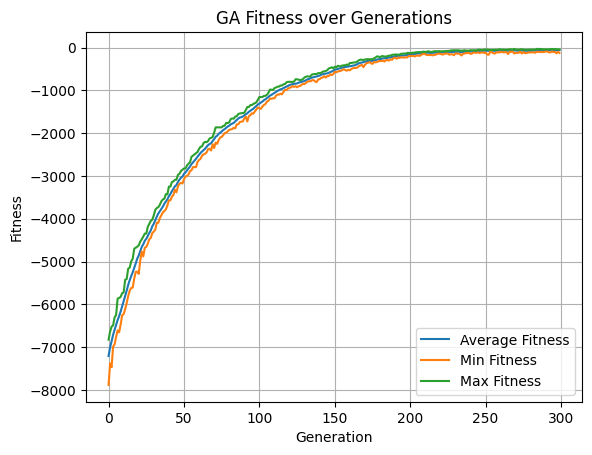

In [56]:
# --- Plot results ---
plt.plot(avg_fitness, label='Average Fitness')
plt.plot(min_fitness, label='Min Fitness')
plt.plot(max_fitness, label='Max Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('GA Fitness over Generations')
plt.legend()
plt.grid(True)
plt.show()

# Problem 2

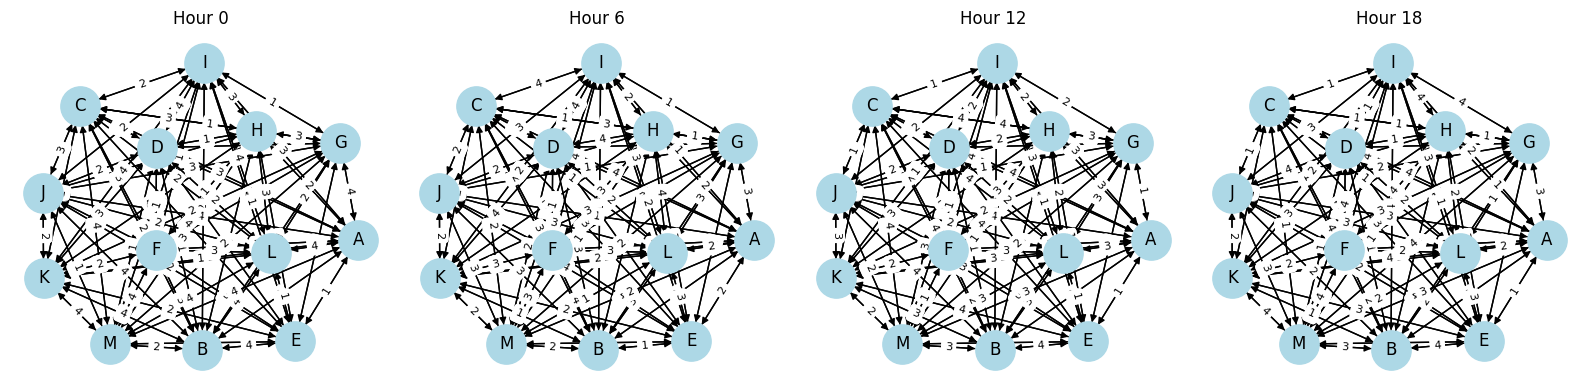

In [81]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def generate_time_dependent_graph(cities):
    graph = {}
    for from_city in cities:
        graph[from_city] = {}
        for to_city in cities:
            if from_city != to_city:
                graph[from_city][to_city] = [random.randint(1, 4) for _ in range(24)]
    return graph

def get_graph_at_hour(graph, hour):
    hourly_graph = nx.DiGraph()
    for from_node, edges in graph.items():
        for to_node, weights in edges.items():
            hourly_graph.add_edge(from_node, to_node, weight=weights[hour])
    return hourly_graph

def draw_graphs_for_hours(graph, hours):
    fig, axes = plt.subplots(1, len(hours), figsize=(16, 4))
    pos = nx.spring_layout(nx.DiGraph(graph))  # fixed layout for all graphs

    for idx, hour in enumerate(hours):
        G_hour = get_graph_at_hour(graph, hour)
        ax = axes[idx]
        ax.set_title(f'Hour {hour}')
        nx.draw(G_hour, pos, ax=ax, with_labels=True, node_color='lightblue', node_size=800, arrows=True)
        labels = nx.get_edge_attributes(G_hour, 'weight')
        nx.draw_networkx_edge_labels(G_hour, pos, edge_labels=labels, ax=ax, font_size=8)

    plt.tight_layout()
    plt.show()

# Create the graph and visualize it
cities = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']
time_dependent_graph = generate_time_dependent_graph(cities)

# Render for 4 sample hours
draw_graphs_for_hours(time_dependent_graph, hours=[0, 6, 12, 18])


In [82]:
import random

def evaluate_genome(genome, graph_data, start_city):
    current_time = 0
    current_city = start_city
    visited = set([current_city])

    for next_city in genome:
        if next_city == current_city:
            continue

        graph_at_time = get_graph_at_hour(graph_data, current_time % 24)
        if not graph_at_time.has_edge(current_city, next_city):
            continue

        travel_time = graph_at_time[current_city][next_city]['weight']
        current_time += travel_time
        current_city = next_city
        visited.add(current_city)

        if len(visited) == len(graph_data):
            break

    return -current_time if len(visited) == len(graph_data) else -float('inf')

def mutate(genome, cities, mutation_rate=0.1):
    new_genome = genome[:]
    for i in range(len(new_genome)):
        if random.random() < mutation_rate:
            new_genome[i] = random.choice(cities)
    return new_genome

def crossover(parent1, parent2):
    return [random.choice([g1, g2]) for g1, g2 in zip(parent1, parent2)]

def run_generation(population, graph, cities, start_city, mutation_rate=0.1):
    scored_population = [(genome, evaluate_genome(genome, graph, start_city)) for genome in population]
    scored_population.sort(key=lambda x: x[1], reverse=True)

    next_generation = [genome for genome, _ in scored_population[:2]]  # elitism

    while len(next_generation) < len(population):
        parent1, parent2 = random.choices(scored_population[:5], k=2)
        child = crossover(parent1[0], parent2[0])
        mutated_child = mutate(child, cities, mutation_rate)
        next_generation.append(mutated_child)

    return next_generation, scored_population[0]

def genetic_algorithm(graph, cities, start_city='A', generations=10, pop_size=500, mutation_rate=0.1):
    genome_length = 2 * len(cities)
    population = [
        [random.choice(cities) for _ in range(genome_length)]
        for _ in range(pop_size)
    ]

    best_overall = (None, -float('inf'))
    for gen in range(generations):
        population, best = run_generation(population, graph, cities, start_city, mutation_rate)
        if best[1] > best_overall[1]:
            best_overall = best
        print(f"Generation {gen+1}: Best fitness = {best[1]}")

    print("\nBest path found:", best_overall[0])
    print("Final fitness:", best_overall[1])
    return best_overall

# --- Run the GA on your existing graph ---
best_path, best_fitness = genetic_algorithm(time_dependent_graph, cities)


Generation 1: Best fitness = -35
Generation 2: Best fitness = -30
Generation 3: Best fitness = -27
Generation 4: Best fitness = -24
Generation 5: Best fitness = -24
Generation 6: Best fitness = -22
Generation 7: Best fitness = -21
Generation 8: Best fitness = -21
Generation 9: Best fitness = -21
Generation 10: Best fitness = -21

Best path found: ['L', 'F', 'D', 'K', 'B', 'M', 'C', 'E', 'J', 'G', 'I', 'H', 'F', 'K', 'J', 'J', 'J', 'A', 'L', 'B', 'L', 'E', 'L', 'L', 'G', 'C']
Final fitness: -21
